# Basket Analysis

In [2]:
# Bibliotecas requeridas
import sys
sys.path.append('../scr/')

import warnings
warnings.filterwarnings('ignore')

import loadAndTransformData as ltd
import viewDataFunctions as vdf
import basketAnalysis as ba

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

In [3]:
# Cargar los datos
ruta_archivo = '../data/processed/Minimarket_Sales_Data_Transform_By_Subcategory.csv'
datos = ltd.cargar_csv(ruta_archivo)

# Convertir tipo de datos a bool
datos = ltd.convertir_a_bool(datos)

Archivo cargado correctamente.


In [91]:
datos

,Aceites,Aceites Finos,Aderezos,Afeitado,Aguas,Aguas Saborizadas,Ají,Alimento Humedo,Alimento Seco,Analgésicos,...,Vacaciones,Valor Agregado,Vegetales,Velas Y Fosforos,Verduras,Vinagres,Vinos,Volumen,Waffers,Yogures Personal
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39118,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
39119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
# Crear un grid de parámetros para probar
parametros_grid = list(ParameterGrid({
    'soporte_minimo': [0.05],
    'confianza_minima': [0.15]
}))

# Calibrar Apriori
mejor_configuracion_apriori, mejores_reglas_apriori, itemsets_frecuentes_apriori = ba.calibrar_apriori(datos, parametros_grid)

In [115]:
# Mostrar la mejor configuración para Apriori
print("Mejor configuración Apriori:")
mejor_configuracion_apriori

Mejor configuración Apriori:


{'confianza_minima': 0.15, 'soporte_minimo': 0.05}

In [117]:
# Mostrar frecuencia de items
itemsets_frecuentes_apriori.sort_values(by='support', ascending=False)

,support,itemsets
14,0.232855,(Tissue)
12,0.156915,(Otros)
2,0.149861,(Detergentes)
3,0.142602,(Empaques)
10,0.113667,(Leches Larga Vida)
7,0.094088,(Jabonería)
9,0.086599,(Lavaplatos)
0,0.085832,(Blanqueador)
1,0.078266,(Cuidado De Prendas)
4,0.076707,(Familiar)


In [119]:
# Mostrar el top 10 de reglas de Apriori
mejores_reglas_apriori.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Jabonería),(Tissue),0.094088,0.232855,0.052322,0.556099,2.388173,0.030413,1.728188,0.641640
2,(Tissue),(Jabonería),0.232855,0.094088,0.052322,0.224698,2.388173,0.030413,1.168464,0.757706
0,(Detergentes),(Tissue),0.149861,0.232855,0.064182,0.428279,1.839249,0.029286,1.341817,0.536735
1,(Tissue),(Detergentes),0.232855,0.149861,0.064182,0.275631,1.839249,0.029286,1.173628,0.594803


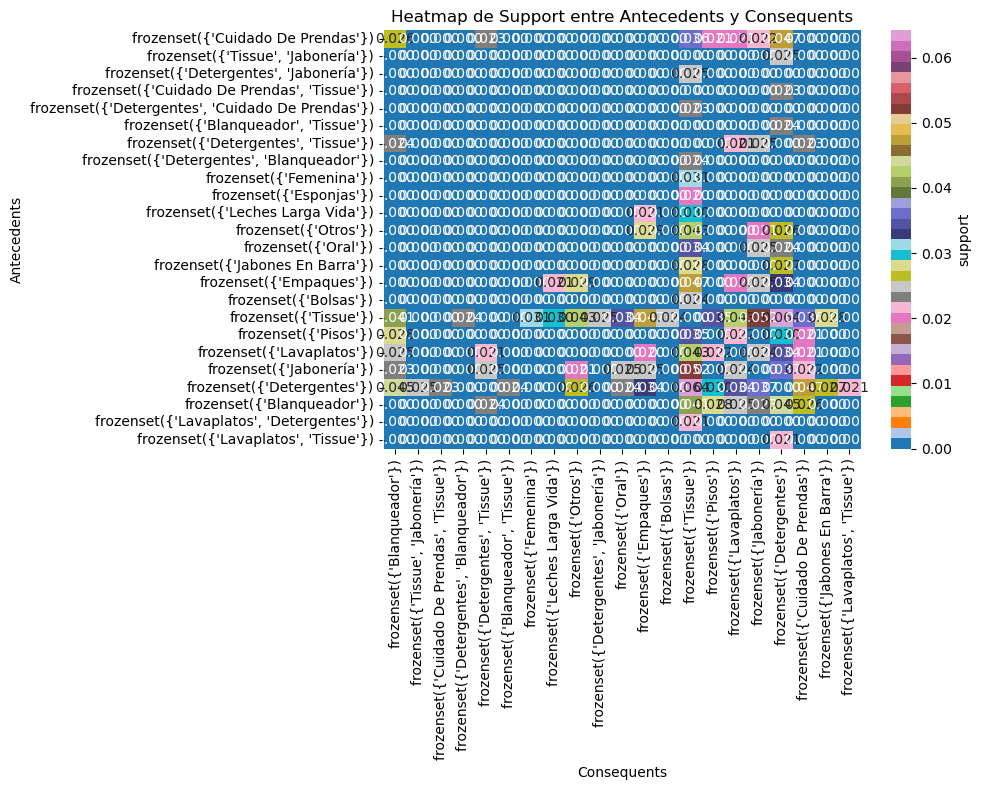

In [101]:
fig=vdf.crear_heatmap_asociacion(mejores_reglas_apriori)

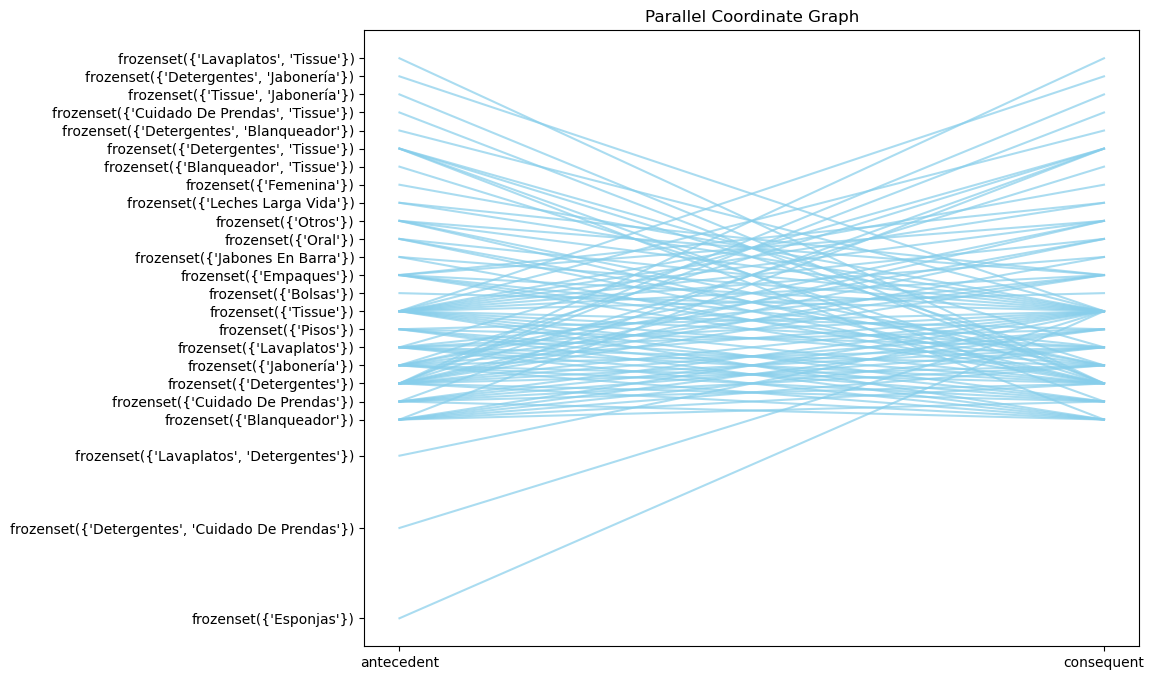

In [103]:
fig = vdf.graficar_coordenadas_paralelas(mejores_reglas_apriori)

In [159]:
# Crear un grid de parámetros para probar
parametros_grid = list(ParameterGrid({
    'soporte_minimo': [0.05],
    'confianza_minima': [0.15]
}))

# Calibrar Apriori
mejor_configuracion_apriori, mejores_reglas_apriori, itemsets_frecuentes_apriori = ba.calibrar_apriori(datos, parametros_grid)

print(len(mejores_reglas_apriori))

# Mostrar el top 10 de reglas de Apriori
mejores_reglas_apriori.sort_values(by='lift', ascending=False)

# Crear la columna combinada con el conjunto de antecedents y consequents
mejores_reglas_apriori['combinacion'] = mejores_reglas_apriori.apply(lambda row: frozenset(row['antecedents']).union(row['consequents']), axis=1)

# Obtener combinaciones únicas
combinaciones_unicas = mejores_reglas_apriori.drop_duplicates(subset='combinacion')

print(len(combinaciones_unicas))

4
2


In [161]:
# Crear un grid de parámetros para probar
parametros_grid = list(ParameterGrid({
    'soporte_minimo': [0.02],
    'confianza_minima': [0.15]
}))

# Calibrar Apriori
mejor_configuracion_apriori, mejores_reglas_apriori, itemsets_frecuentes_apriori = ba.calibrar_apriori(datos, parametros_grid)

print(len(mejores_reglas_apriori))

# Mostrar el top 10 de reglas de Apriori
mejores_reglas_apriori.sort_values(by='lift', ascending=False)
# Crear la columna combinada con el conjunto de antecedents y consequents
mejores_reglas_apriori['combinacion'] = mejores_reglas_apriori.apply(lambda row: frozenset(row['antecedents']).union(row['consequents']), axis=1)

# Obtener combinaciones únicas
combinaciones_unicas = mejores_reglas_apriori.drop_duplicates(subset='combinacion')

print(len(combinaciones_unicas))

85
42


In [165]:
###Crear un grid de parámetros para probar
parametros_grid = list(ParameterGrid({
    'soporte_minimo': [0.02],
    'confianza_minima': [0.20]
}))

# Calibrar Apriori
mejor_configuracion_apriori, mejores_reglas_apriori, itemsets_frecuentes_apriori = ba.calibrar_apriori(datos, parametros_grid)

print(len(mejores_reglas_apriori))

# Mostrar el top 10 de reglas de Apriori
mejores_reglas_apriori.sort_values(by='lift', ascending=False)

# Crear la columna combinada con el conjunto de antecedents y consequents
mejores_reglas_apriori['combinacion'] = mejores_reglas_apriori.apply(lambda row: frozenset(row['antecedents']).union(row['consequents']), axis=1)

# Obtener combinaciones únicas
combinaciones_unicas = mejores_reglas_apriori.drop_duplicates(subset='combinacion')

print(len(combinaciones_unicas))

71
40


In [167]:
#### Crear un grid de parámetros para probar
parametros_grid = list(ParameterGrid({
    'soporte_minimo': [0.02],
    'confianza_minima': [0.25]
}))

# Calibrar Apriori
mejor_configuracion_apriori, mejores_reglas_apriori, itemsets_frecuentes_apriori = ba.calibrar_apriori(datos, parametros_grid)

print(len(mejores_reglas_apriori))

# Mostrar el top 10 de reglas de Apriori
mejores_reglas_apriori.sort_values(by='lift', ascending=False)

# Crear la columna combinada con el conjunto de antecedents y consequents
mejores_reglas_apriori['combinacion'] = mejores_reglas_apriori.apply(lambda row: frozenset(row['antecedents']).union(row['consequents']), axis=1)

# Obtener combinaciones únicas
combinaciones_unicas = mejores_reglas_apriori.drop_duplicates(subset='combinacion')

print(len(combinaciones_unicas))

57
36


In [175]:
### Crear un grid de parámetros para probar
parametros_grid = list(ParameterGrid({
    'soporte_minimo': [0.03],
    'confianza_minima': [0.25]
}))

# Calibrar Apriori
mejor_configuracion_apriori, mejores_reglas_apriori, itemsets_frecuentes_apriori = ba.calibrar_apriori(datos, parametros_grid)

print(len(mejores_reglas_apriori))

# Mostrar el top 10 de reglas de Apriori
mejores_reglas_apriori.sort_values(by='lift', ascending=False)

18


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Detergentes),(Cuidado De Prendas),0.149861,0.078266,0.046546,0.310592,3.968414,0.034817,1.336993,0.879868
4,(Cuidado De Prendas),(Detergentes),0.078266,0.149861,0.046546,0.594709,3.968414,0.034817,2.097604,0.811525
0,(Detergentes),(Blanqueador),0.149861,0.085832,0.044705,0.298311,3.475533,0.031842,1.302812,0.837832
1,(Blanqueador),(Detergentes),0.085832,0.149861,0.044705,0.520846,3.475533,0.031842,1.774250,0.779150
8,(Pisos),(Detergentes),0.064693,0.149861,0.030391,0.469775,3.134743,0.020696,1.603355,0.728098
7,(Lavaplatos),(Detergentes),0.086599,0.149861,0.034123,0.394038,2.629360,0.021145,1.402958,0.678431
6,(Jabonería),(Detergentes),0.094088,0.149861,0.036781,0.390926,2.608598,0.022681,1.395791,0.680698
13,(Jabonería),(Tissue),0.094088,0.232855,0.052322,0.556099,2.388173,0.030413,1.728188,0.641640
17,(Pisos),(Tissue),0.064693,0.232855,0.034788,0.537732,2.309297,0.019724,1.659524,0.606184
14,(Lavaplatos),(Tissue),0.086599,0.232855,0.042788,0.494097,2.121904,0.022623,1.516386,0.578853


In [177]:
# Crear la columna combinada con el conjunto de antecedents y consequents
mejores_reglas_apriori['combinacion'] = mejores_reglas_apriori.apply(lambda row: frozenset(row['antecedents']).union(row['consequents']), axis=1)

# Obtener combinaciones únicas
combinaciones_unicas = mejores_reglas_apriori.drop_duplicates(subset='combinacion')

In [179]:
combinaciones_unicas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combinacion
0,(Detergentes),(Blanqueador),0.149861,0.085832,0.044705,0.298311,3.475533,0.031842,1.302812,0.837832,"(Detergentes, Blanqueador)"
2,(Blanqueador),(Tissue),0.085832,0.232855,0.041101,0.478856,2.056455,0.021115,1.472041,0.561960,"(Blanqueador, Tissue)"
3,(Detergentes),(Cuidado De Prendas),0.149861,0.078266,0.046546,0.310592,3.968414,0.034817,1.336993,0.879868,"(Detergentes, Cuidado De Prendas)"
5,(Cuidado De Prendas),(Tissue),0.078266,0.232855,0.036321,0.464076,1.992979,0.018097,1.431442,0.540545,"(Cuidado De Prendas, Tissue)"
6,(Jabonería),(Detergentes),0.094088,0.149861,0.036781,0.390926,2.608598,0.022681,1.395791,0.680698,"(Detergentes, Jabonería)"
7,(Lavaplatos),(Detergentes),0.086599,0.149861,0.034123,0.394038,2.629360,0.021145,1.402958,0.678431,"(Lavaplatos, Detergentes)"
8,(Pisos),(Detergentes),0.064693,0.149861,0.030391,0.469775,3.134743,0.020696,1.603355,0.728098,"(Detergentes, Pisos)"
9,(Detergentes),(Tissue),0.149861,0.232855,0.064182,0.428279,1.839249,0.029286,1.341817,0.536735,"(Detergentes, Tissue)"
11,(Empaques),(Tissue),0.142602,0.232855,0.046801,0.328195,1.409437,0.013596,1.141916,0.338812,"(Tissue, Empaques)"
12,(Femenina),(Tissue),0.068272,0.232855,0.030647,0.448896,1.927787,0.014749,1.392013,0.516535,"(Femenina, Tissue)"
